# Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
# Loading the dataset
df=pd.read_excel("marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [7]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Dropping null values
df=df.dropna()
df.shape

(2216, 29)

In [10]:
# Converting Dt_Customer column from object to datetime format
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer']).dt.date
# Most recent customer
print("Most recent customer's enrollment date: ",df['Dt_Customer'].max())
print("Oldest customer's enrollment date: ",df['Dt_Customer'].min())

Most recent customer's enrollment date:  2014-06-29
Oldest customer's enrollment date:  2012-07-30


In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
# Making a new feature representing number of days of a customer till most recent customer's enrollment date.
d=df['Dt_Customer'].max()
days=[]
for i in df['Dt_Customer']:
    d1=d-i
    days.append(d1)
df['No_of_days']=days
df['No_of_days']
df['Days']=df['No_of_days'].dt.days
df['Days']
df.drop(columns=['No_of_days'],axis=1,inplace=True)

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [14]:
# Rename columns
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                       "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
# Extracting new features from given features

# Age of the customer
df['Age']=2023-df['Year_Birth']

# Number of kids in the home
df['No_of_Children']=df['Kidhome']+df['Teenhome']

# Is parent?
df['Is_parent']=np.where(df['No_of_Children']>0,1,0)

# Total expenditure
df['Total_spent']=df["Wines"]+df["Fruits"]+df["Meat"]+df["Fish"]+df["Sweets"]+df["Gold"]

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days,Age,No_of_Children,Is_parent,Total_spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,663,66,0,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,113,69,2,1,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,312,58,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,139,39,1,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,161,42,1,1,422


In [18]:
# Drop unnecessary features
df=df.drop(columns=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2'],axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days,Age,No_of_Children,Is_parent,Total_spent
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,1,663,66,0,0,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,113,69,2,1,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,312,58,0,0,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,139,39,1,1,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,161,42,1,1,422


In [19]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days,Age,No_of_Children,Is_parent,Total_spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,2.671029,5.800993,5.319043,0.009477,0.150271,353.521209,54.179603,0.947202,0.714350,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.926734,3.250785,2.425359,0.096907,0.357417,202.434667,11.985554,0.749062,0.451825,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,180.000000,46.000000,0.000000,0.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,2.000000,5.000000,6.000000,0.000000,0.000000,355.500000,53.000000,1.000000,1.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,529.000000,64.000000,1.000000,1.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,699.000000,130.000000,3.000000,1.000000,2525.000000


In [20]:
# Removing outliers for income and age
df=df[(df['Age']<100)]
df=df[(df['Income']<100000)]

In [21]:
df.shape

(2200, 24)

<AxesSubplot:>

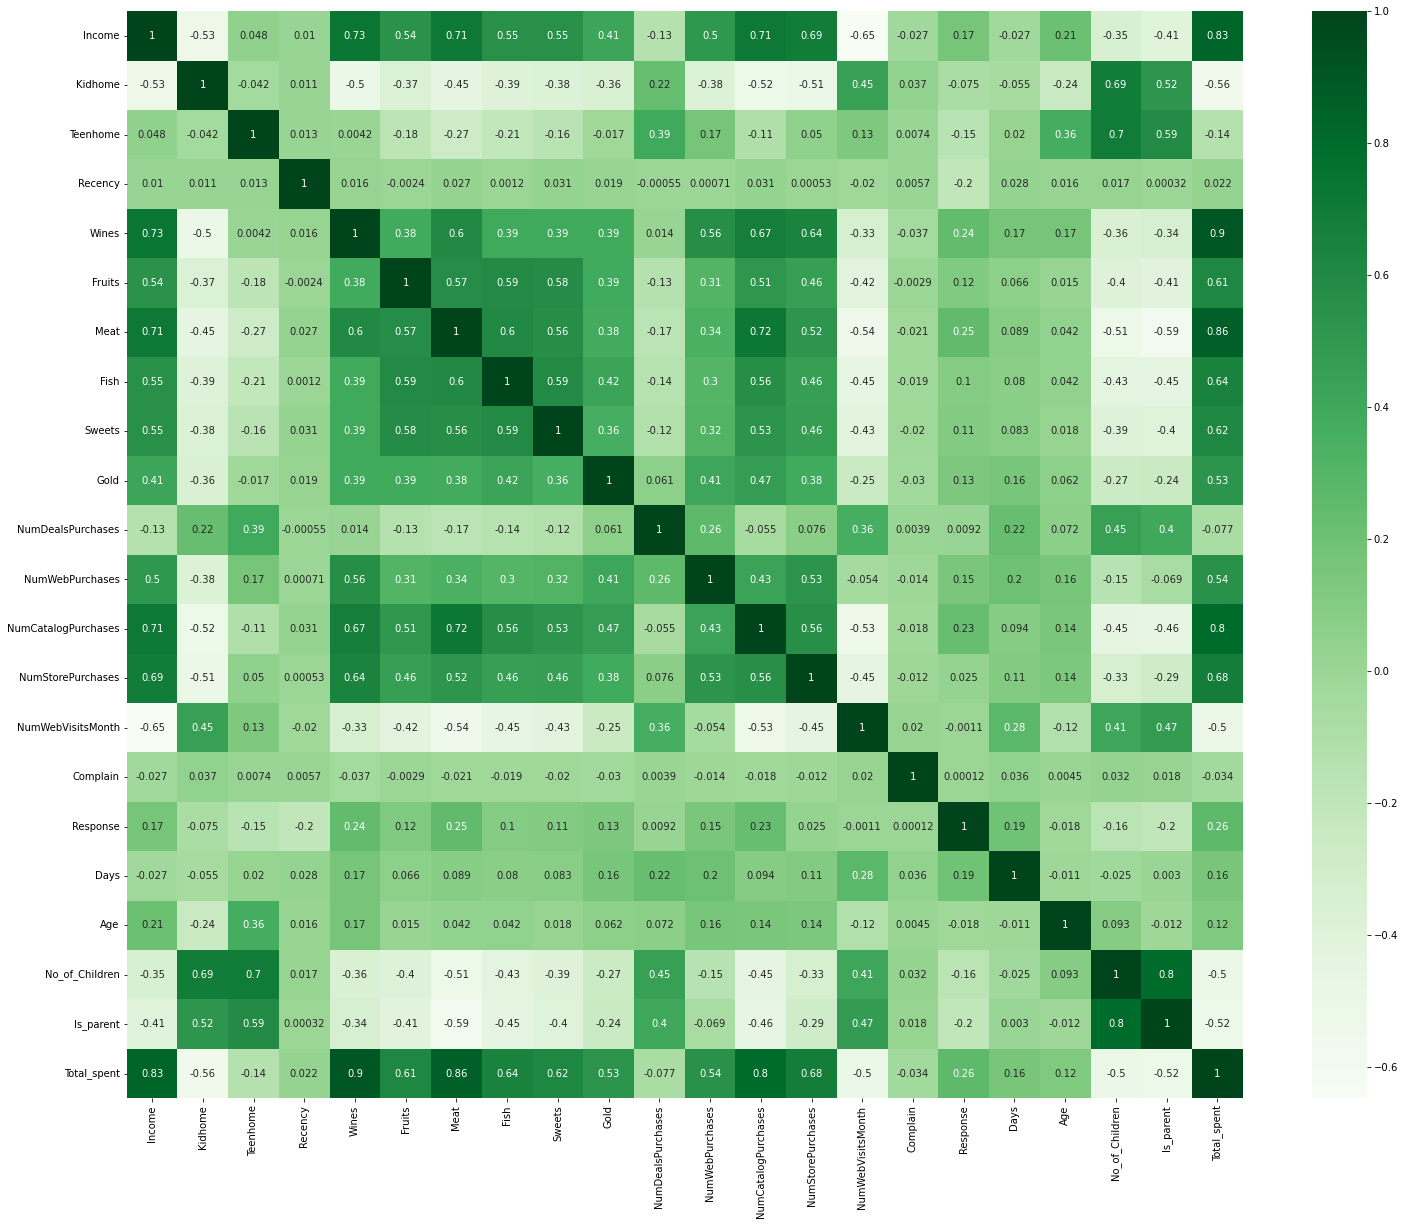

In [22]:
# Correlation Matrix
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

# Data Preprocessing

In [23]:
# Convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder  
lst=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        lst.append(i)
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days,Age,No_of_Children,Is_parent,Total_spent
0,2,4,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,1,663,66,0,0,1617
1,2,4,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,113,69,2,1,27
2,2,5,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,312,58,0,0,776
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,139,39,1,1,53
4,4,3,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,161,42,1,1,422


In [24]:
df.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days,Age,No_of_Children,Is_parent,Total_spent
2235,2,3,61223.0,0,1,46,709,43,182,42,...,3,4,5,0,0,381,56,1,1,1341
2236,4,5,64014.0,2,1,56,406,0,30,0,...,2,5,7,0,0,19,77,3,1,444
2237,2,2,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,0,155,42,0,0,1241
2238,3,5,69245.0,0,1,8,428,30,214,80,...,5,10,3,0,0,156,67,1,1,843
2239,4,3,52869.0,1,1,40,84,3,61,2,...,1,4,7,0,1,622,69,2,1,172


In [25]:
df['Education'].unique()

array([2, 4, 3, 1, 0])

In [26]:
df['Marital_Status'].unique()

array([4, 5, 3, 2, 6, 1, 0, 7])

In [22]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Days', 'Age', 'No_of_Children', 'Is_parent', 'Total_spent'],
      dtype='object')

In [23]:
# Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler  
s=StandardScaler()
df1=pd.DataFrame(s.fit_transform(df))
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.349296,0.255400,0.322649,-0.824976,-0.932743,0.309694,0.976910,1.558576,1.747283,2.453291,...,2.640049,-0.561730,0.686955,-0.095783,2.384729,1.528008,1.017315,-1.270346,-1.591006,1.681690
1,-0.349296,0.255400,-0.250642,1.036508,0.904351,-0.381727,-0.873971,-0.638639,-0.731316,-0.651699,...,-0.586478,-1.180872,-0.142519,-0.095783,-0.419335,-1.188012,1.273732,1.401510,0.628533,-0.962337
2,-0.349296,1.184127,0.977651,-0.824976,-0.932743,-0.796580,0.356983,0.573618,-0.175926,1.339147,...,-0.227975,1.295695,-0.557255,-0.095783,-0.419335,-0.205306,0.333536,-1.270346,-1.591006,0.283183
3,-0.349296,1.184127,-1.208136,1.036508,-0.932743,-0.796580,-0.873971,-0.562873,-0.667056,-0.505582,...,-0.944982,-0.561730,0.272218,-0.095783,-0.419335,-1.059618,-1.290438,0.065582,0.628533,-0.919101
4,1.433652,-0.673327,0.330184,1.036508,-0.932743,1.554251,-0.393454,0.422086,-0.217236,0.151945,...,0.130528,0.057411,-0.142519,-0.095783,-0.419335,-0.950978,-1.034021,0.065582,0.628533,-0.305487


# Dimensionality Reduction

In [23]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA  
pca=PCA(n_components=3)
df2=pd.DataFrame(pca.fit_transform(df1),columns=(['column1','column2','column3']))
df2.head()

,column1,column2,column3
0,4.921249,0.031771,2.742915
1,-2.912063,0.186005,-1.788301
2,2.481452,-0.948626,-0.344559
3,-2.724876,-1.659436,0.115096
4,-0.526518,0.165904,-0.152358


# Model Training and Prediction

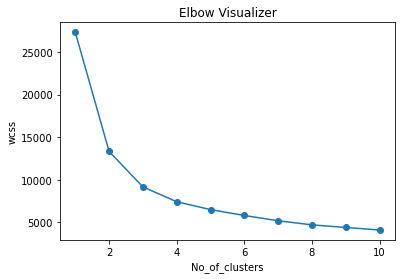

In [24]:
# Determine optimal number of clusters
from sklearn.cluster import KMeans
data=df2.iloc[:,:]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Visualizer')
plt.xlabel('No_of_clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
# Training the model
kmeans=KMeans(n_clusters=4, init='k-means++', random_state= 42)
predicted_data= kmeans.fit_predict(data)
df2['Clusters']=predicted_data
df['Clusters']=predicted_data
df2

,column1,column2,column3,Clusters
0,4.921249,0.031771,2.742915,1
1,-2.912063,0.186005,-1.788301,0
2,2.481452,-0.948626,-0.344559,1
3,-2.724876,-1.659436,0.115096,2
4,-0.526518,0.165904,-0.152358,0
...,...,...,...,...
2195,2.533806,1.911476,0.725853,3
2196,-2.365005,3.707012,-1.362374,0
2197,2.176110,-1.498246,-0.352481,1
2198,1.749631,1.385056,-1.862295,3


# Visualization of clusters

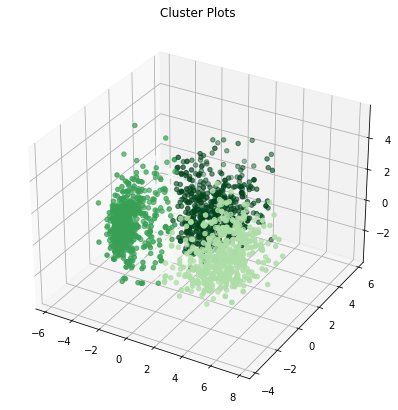

In [26]:
# Visualizing the clusters
x=df2['column1']
y=df2['column2']
z=df2['column3']
plt.figure(figsize=(10,7))
axis=plt.axes(projection='3d')
axis.scatter3D(x,y,z,cmap='Greens',c=df2['Clusters'],marker='o')
plt.title('Cluster Plots')
plt.show()

# Evaluation

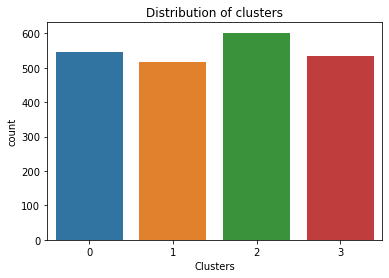

In [27]:
# Distribution of clusters
sns.countplot(x=df2['Clusters'],data=df2)
plt.title('Distribution of clusters')
plt.show()  

ALL THE CLUSTERS ARE EQUITABLY DISTRIBUTED

# Visualizing patterns in each cluster

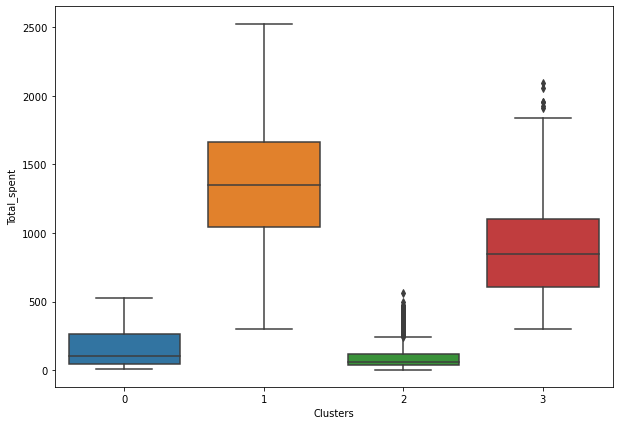

In [28]:
# Expenditure by clusters
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Clusters'],y=df['Total_spent'],data=df)
plt.show()

HIGHEST EXPENDITURE IS BY CLUSTER 1 AND LOWEST EXPENDITURE IS BY CLUSTER 2

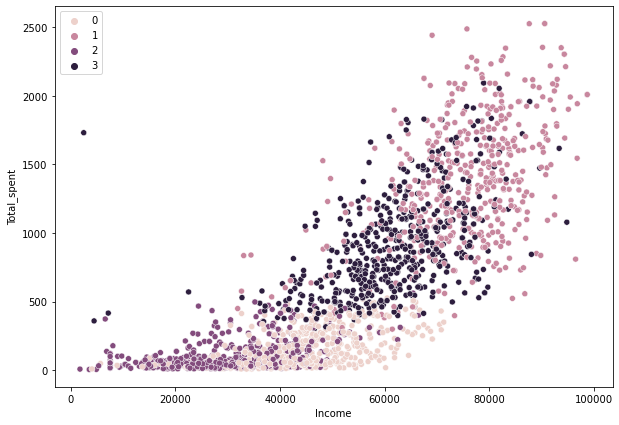

In [29]:
# Income vs Spent
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Income'],y=df['Total_spent'],hue=df['Clusters'],data=df)
plt.legend()
plt.show()

CLUSTER 0 : AVERAGE INCOME, LOW EXPENDITURE

CLUSTER 1 : HIGH INCOME, HIGH EXPENDITURE

CLUSTER 2 : LOW INCOME, LOW EXPENDITURE

CLUSTER 3 : HIGH INCOME, AVERAGE EXPENDITURE

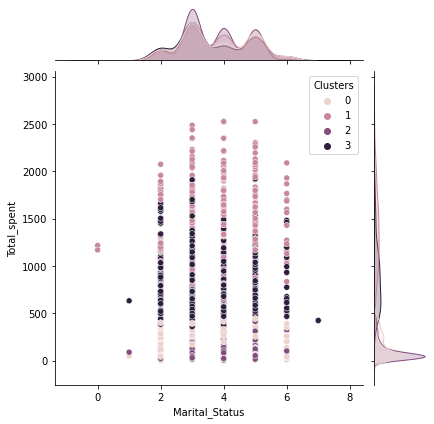

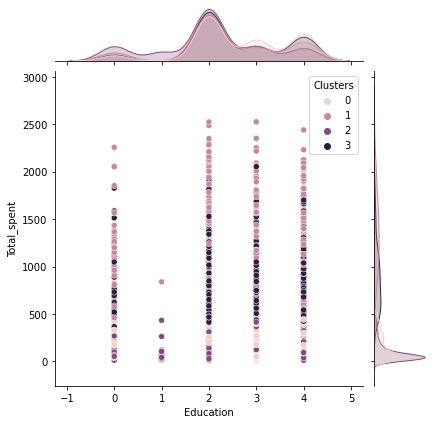

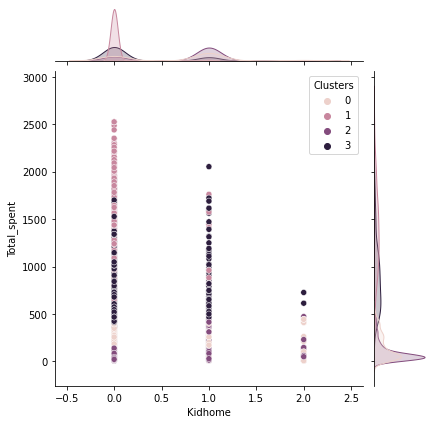

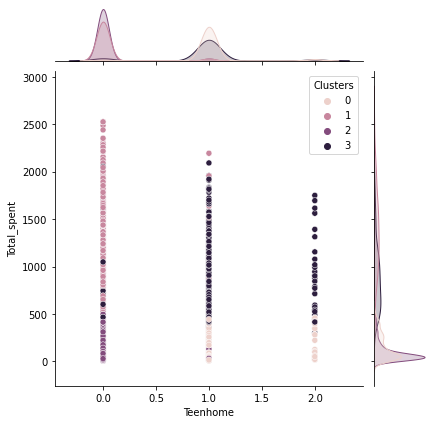

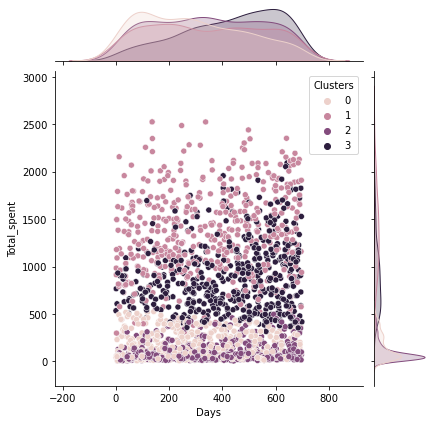

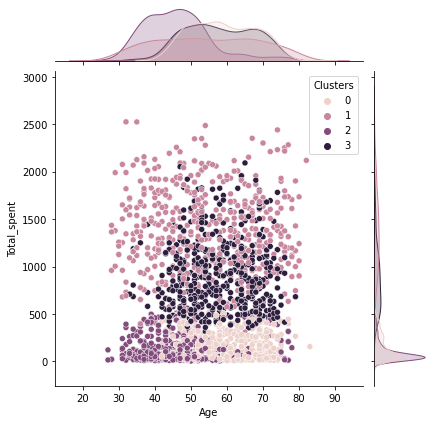

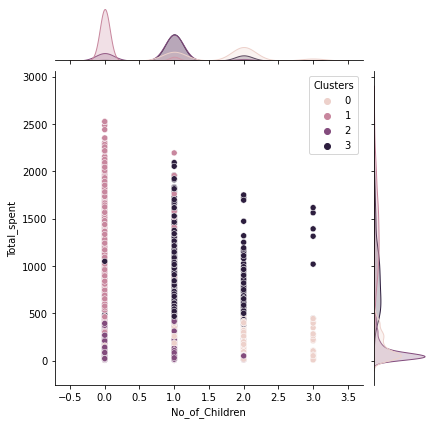

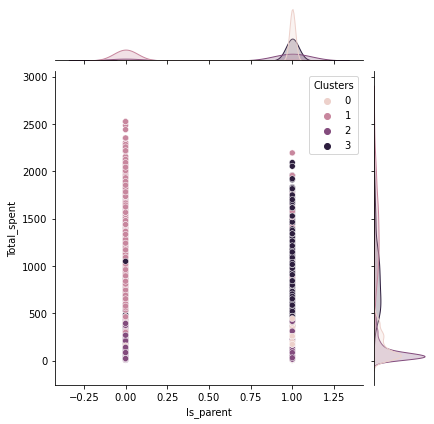

In [30]:
# Expenditure according to personal traits
lst = [ "Marital_Status","Education","Kidhome","Teenhome","Days", "Age", "No_of_Children","Is_parent"]  
for i in lst:
    sns.jointplot(x=df[i],y=df['Total_spent'],hue=df['Clusters'],data=df)
    plt.show()

1. "MARRIED" AND "TOGETHER" CATEGORIES HAVE HIGHER EXPENDITURE.
2. "GRADUATED" CATEGORY HAS HIGHEST EXPENDITURE.
3. HIGHEST EXPENDITURE IS BY CATEGORY HAVING NO KIDS AT HOME.
4. HIGHEST EXPENDITURE IS BY CATEGORY HAVING NO TEENAGERS AT HOME.
5. IN ALL DAYS, MAXIMUM EXPENDITURE IS BY CLUSTER 1.
6. FOR ALL AGES, MAXIMUM EXPENDITURE IS BY CLUSTER 1.
7. MAXIMUM EXPENDITURE IS BY CATEGORY HAVING NO CHILDREN AT HOME/NOT PARENT.